In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:

ticker = 'TSLA'
tsla = yf.download(ticker, start='2024-01-01', end='2024-11-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600


In [8]:
tsla.isnull().sum()

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [9]:
tsla.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2024-10-28,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2024-10-29,259.519989,259.519989,264.980011,255.509995,264.510010,80521800
2024-10-30,257.549988,257.549988,263.350006,255.820007,258.040009,53993600
2024-10-31,249.850006,249.850006,259.750000,249.250000,257.989990,66575300


In [12]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1006 non-null   float64
 1   (Close, TSLA)      1006 non-null   float64
 2   (High, TSLA)       1006 non-null   float64
 3   (Low, TSLA)        1006 non-null   float64
 4   (Open, TSLA)       1006 non-null   float64
 5   (Volume, TSLA)     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


<Axes: xlabel='Date'>

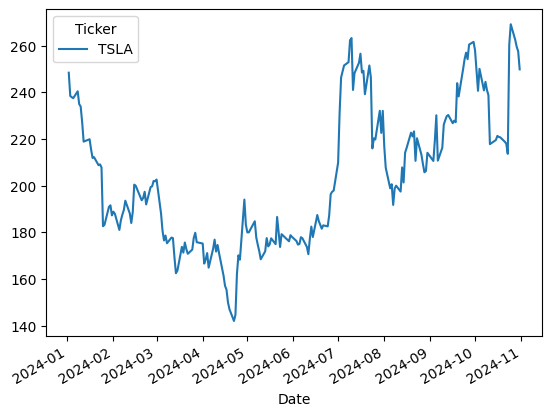

In [10]:
tsla['Close'].plot()


<Axes: xlabel='Date'>

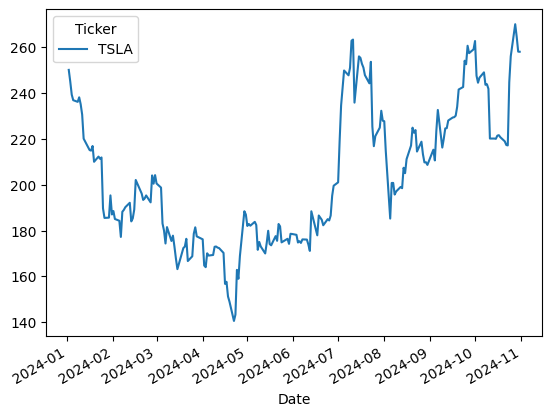

In [11]:
tsla['Open'].plot()

In [14]:

tsla['Close Rolling 10'] = tsla['Close'].rolling(window=10,min_periods=1).mean()
tsla.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,248.419998
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,243.434998
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,241.599996
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,240.572498
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,240.547998
2024-01-09,234.960007,234.960007,238.960007,232.039993,238.110001,96705700,239.616666
2024-01-10,233.940002,233.940002,235.500000,231.289993,235.100006,91628500,238.805714
2024-01-11,227.220001,227.220001,230.929993,225.369995,230.570007,105873600,237.357500


<Axes: xlabel='Date'>

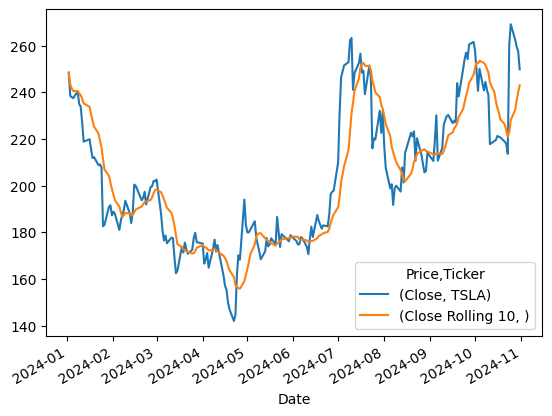

In [15]:
tsla[['Close','Close Rolling 10']].plot()


In [17]:
tsla['Close Rolling 30'] = tsla['Close'].rolling(window=30,min_periods=1).mean()

In [20]:
tsla['Close Rolling 50'] = tsla['Close'].rolling(window=50,min_periods=1).mean()
tsla

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,248.419998,248.419998,NaN
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,243.434998,243.434998,NaN
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,241.599996,241.599996,NaN
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,240.572498,240.572498,NaN
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,240.547998,240.547998,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900,228.179002,238.804667,NaN
2024-10-28,262.510010,262.510010,273.540009,262.239990,270.000000,107653600,232.514003,239.995668,NaN


<Axes: xlabel='Date'>

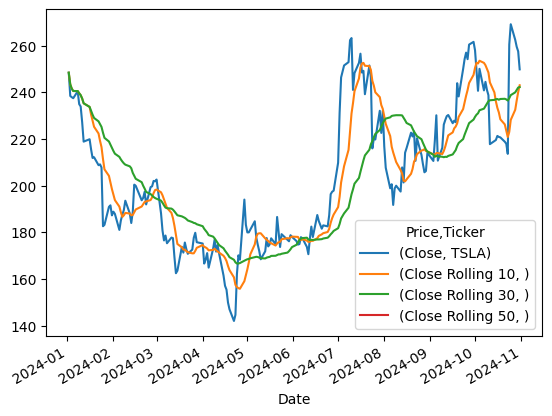

In [22]:
tsla[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()